$\newcommand{\bmx}{\large \boldsymbol{x} \normalsize}$
$\newcommand{\bmc}{\large \boldsymbol{c} \normalsize}$
$\newcommand{\bmy}{\large \boldsymbol{y} \normalsize}$
$\newcommand{\bmb}{\large \boldsymbol{b} \normalsize}$
$\newcommand{\bmw}{\large \boldsymbol{w} \normalsize}$
$\newcommand{\bme}{\large \boldsymbol{e} \normalsize}$
$\newcommand{\bmu}{\large \boldsymbol{u} \normalsize}$


# Ecuaciones parabolicas: Ecuacion de Calor

Queremos resolver el problema

\begin{eqnarray}
\begin{cases}
\frac{\partial u}{\partial t} - \alpha \frac{\partial ^2}{\partial x^2} = 0 \tag{1} \\
u(x, t_0=c) = I_0(x)  \quad , \quad \text{condicion inicial} \\
u(a, t) = h_1 (t) \quad , \quad u(b,t) = h_2(t) \quad , \quad \text{condiciones de frontera}
\end{cases}
\end{eqnarray}

Entonces hay tanto condiciones iniciales como de frontera (IBVP: Initial Boundary Value Problem)




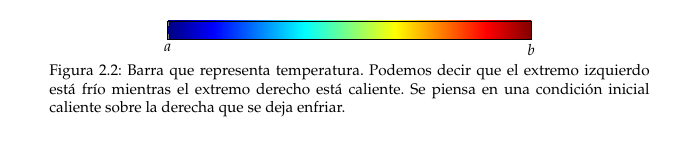



Las condiciones de frontera son en $u(x,t)$ se llaman **Direchlet**, si fueran en $u_x(x,t)$ se llamarian Neumman.

Vamos a estudiar, para la ecuacion de calor tres metodos.

* Hacia adelante (foward in time)
* Hacia atras (Backward in time)
* Promedio de los dos anteriores (Crank-Nicholson)
* El leap-frog (salto de rana)

Comenzmos con


## Diferencias finits progresivas en tiempo y centradas en espacio (FTCS: Forward time central space)


Veamos las ecuaciones para esto.


$$ u_t(x_i, t_j) = \frac{w_{i j+1}- w_{ij}}{k} + \mathcal{O}(k).$$
$k=\Delta t$

Ahora
$$ u_{xx}(x_i, t_j) = \frac{w_{i+1 j}  - 2 w_{ij}  + w_{i-1 j}}{h^2}  
\quad , \quad \mathcal{O}(h^2) $$
$h=\Delta x$.

Insertamos estas dos en la ecuacion diferencial (1)

$$\frac{w_{i j+1} - w_{ij}}{k} - \alpha \frac{w_{i+1 j}  - 2 w_{ij}  + w_{i-1 j}}{h^2} = 0.$$

Despejemos $w_{i j+1 }$

$$w_{i j+1} = w_{ij} + \frac{\alpha k}{h^2} ( w_{i+1 j} - 2 w_{ij}  + w_{i-1 j}).$$

De otra forma

$$ w_{i j+1} = \left (  1 - 2 \frac{\alpha k}{h^2}  \right ) w_{ij} + \frac{\alpha k}{h^2} ( w_{i+1 j} + w_{i-1 j} ).$$

Podemos simplificar mas

$$ w_{i j+1} = (1 - 2 \gamma) w_{ij} + \gamma( w_{i+1 j} + w_{i-1 j}) .$$
con $\gamma = \alpha k/h^2$
con $
ga\gamma = $\alhppha k/h^2$

En que dominio se mueven los indices. $i=0, \cdots, n$
$j=0, \cdots, m$. Sabemos la solucion para $i=0, i=n$ (fronteras) y $j=0$ condicion inicial. Debemos hallar las demas.




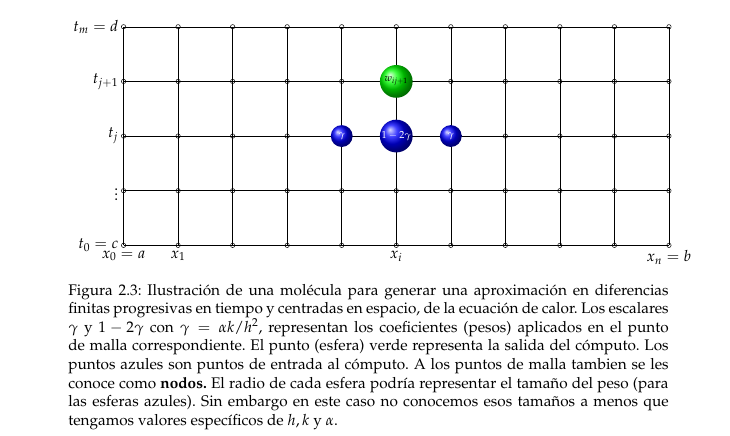

Si no tiviera el valor en las fronteras tendria el siguiente esquema de iteraciones (ver figura)

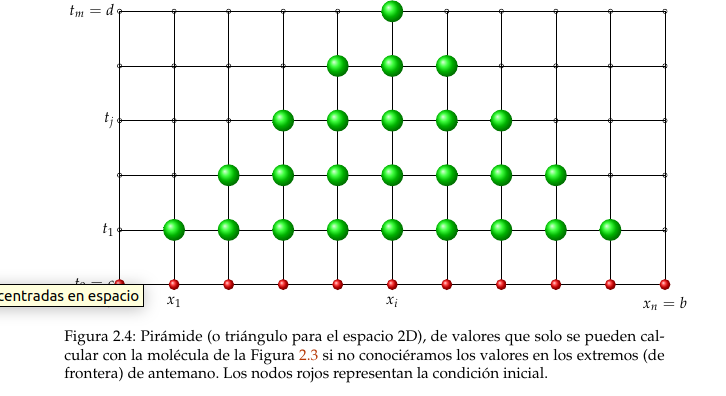

Recuerden entonces que tenemos las coniciones iniciales (puntos rojos en la grafica) $t=t_0$ y las de frontera.

Comencemos a iterar.

* $j=0$
$$ w_{i 1} = (1 - 2 \gamma) w_{i0} + \gamma( w_{i+1 0} + w_{i-1 0}) \quad , \quad 0 < i < n.$$
$$ w_{01} = h_1(t_1) \quad , \quad w_{n1}=h_2(t_1)$$

* $j=1$
$$ w_{i 2} = (1 - 2 \gamma) w_{i1} + \gamma( w_{i+1 1} + w_{i-1 1}) \quad , \quad 0 < i < n.$$
$$ w_{02} = h_1(t_2) \quad , \quad w_{n2}=h_2(t_2)$$

$\vdots$

* tiempo $j$

$$ w_{i j+1} = (1 - 2 \gamma) w_{ij} + \gamma( w_{i+1 j} + w_{i-1 j}) \quad , \quad 0 < i < n. \tag{10} $$
$$ w_{0 j+1} = h_1(t_{j+1}) \quad , \quad w_{n j+1}=h_2(t_{j+1})$$

Vamos a escribir esto en forma matricial.

$$w_{i j+1} = (\gamma \quad 1 - 2 \gamma \quad \gamma)
\begin{pmatrix} w_{i-1 j} \\ w_{ij} \\ w_{i+1} j\end{pmatrix} .$$

Veamos algunos estados en $i$ de esta ecuacion

* $i=1$
$$w_{1 j+1} = (\gamma \quad 1 - 2 \gamma \quad \gamma)
\begin{pmatrix} w_{0 j} \\ w_{1j} \\ w_{2 j}\end{pmatrix} .$$


* $i=2$
$$w_{2 j+1} = (\gamma \quad 1 - 2 \gamma \quad \gamma)
\begin{pmatrix} w_{0 j} \\ w_{2j} \\ w_{3 j}\end{pmatrix} .$$

$\vdots $
$$w_{n-1 j+1} = (\gamma \quad 1 - 2 \gamma \quad \gamma)
\begin{pmatrix} w_{n-2 j} \\ w_{n-1j} \\ w_{n j}\end{pmatrix} .$$


Reesribamos este sistema como sigue

* $i=1$
$$w_{1 j+1} = (\gamma \quad 1 - 2 \gamma \quad \gamma)
\begin{pmatrix} w_{0 j} \\ w_{1j} \\ w_{2 j}\end{pmatrix} =
(1 - 2 \gamma \quad \gamma) \binom{w_{1j}}{w_{2j}} + \gamma w_{0j} .$$


* $i=2$
$$w_{2 j+1} = (\gamma \quad 1 - 2 \gamma \quad \gamma)
\begin{pmatrix} w_{1 j} \\ w_{2j} \\ w_{3 j}\end{pmatrix} .$$

$\vdots $
$$w_{n-1 j+1} = (\gamma \quad 1 - 2 \gamma \quad \gamma)
\begin{pmatrix} w_{n-2 j} \\ w_{n-1j} \\ w_{n j}\end{pmatrix}
= ( \gamma \quad 1 - 2 \gamma) \binom{ w_{n-2 j}}{w_{n-1 j}} + \gamma w_{nj}.$$

En forma matricial

$$\begin{pmatrix} w_{1 j+1} \\ w_{2 j+1} \\ \cdots \\ w_{n-1 j+1} \end{pmatrix} =
\begin{pmatrix}
1 - 2 \gamma & \gamma & 0 & \cdots & 0  \\
\gamma & 1 - 2 \gamma & \gamma & \cdots & 0  \\
0 & \ddots & \ddots & \ddots & 0 \\
\vdots & \ddots & \gamma & 1 - 2 \gamma & \gamma \\
0 & \cdots & 0 & \gamma & 1 - 2 \gamma
\end{pmatrix}.
\begin{pmatrix}
w_{1j} \\ w_{2j} \\ \vdots \\ w_{n-2 j} \\ w_{n-1 j} \end{pmatrix}
+ \gamma \begin{pmatrix} w_{0j} \\ 0 \\ \vdots \\ 0 \\ w_{nj}\end{pmatrix} $$


Recuerde las condiciones iniciales y de frontera

\begin{eqnarray}
w_{i0} = u(x_i, t_0) = I_0(x) \quad , 0 \le i \ne n \quad , \quad \text{inicial} \\
w_{oj} = h_1(t_j) \quad , \quad w_{nj}=h_2(t_j) \quad , 0 < j \le m \quad , \quad \text{de frontera}
\end{eqnarray}

El sistema se puede escribir como

$$\bmw_{j+1} = A \bmw_j + \bmc \tag{2} .$$
donde

$$A =\begin{pmatrix} 1 - 2 \gamma & \gamma & 0 & \cdots & 0  \\
\gamma & 1 - 2 \gamma & \gamma & \cdots & 0  \\
0 & \ddots & \ddots & \ddots & 0 \\
\vdots & \ddots & \gamma & 1 - 2 \gamma & \gamma \\
0 & \cdots & 0 & \gamma & 1 - 2 \gamma
\end{pmatrix}$$.

y

$$\bmc = \gamma \begin{pmatrix} w_{0j} \\ 0 \\ \vdots \\ 0 \\ w_{nj}\end{pmatrix} .$$

Vimos antes que los errores in tiempo dependitan de $\mathcal{O}(k)$, ($k= \Delta t$) en tiempo y $\mathcal{O}(h^2)$, $h =\Delta x$ en espacio pero vamos a analizar la propagacion de errores con el sitema planteado.

En principio si $\rho(A) < 1$, el sistema converge. Vamos a ver que es suficiente que $\rho(A) \le 1$ para que el error no crezca.

Definamos el error $\bme_0 = \bmu_0 -\bmw_0 $
Estudiemos como se propaga el error.
$\bmw_0=  \bmu_0 - \bme_0$.

De las iteraciones del sistema (2)

\begin{eqnarray}
\bmw_1 &=& A \bmw_0 + \bmc  = A \bmu_0 - A \bme_0 + \bmc \\
\bmw_2 &=& A^2 \bmu_0 - A^2 \bme_0 + A \bmc + \bmc \\
&\vdots& \\
\bmw_{j+1} &=& A^{j+1} \bmu_0 - A^{j+1} \bme_0 + \sum_{i=0}^j A^i \bmc
\end{eqnarray}

Quermos controla el error. Queremos que el error no crezca


$$ \| A^{j+1} \bme_0 \| \le \| \bme_0 \| .$$
Como podemos hacer esto?

Recuerden que $\| A^{j+1} \bme_0 \| \le \| A^{j+1} \| \| \bme_0 \| $

Pero esto es posible  si $\| A \| < 1$, pero recuerden
$\rho(A) \le \| A \|$. Entonces es suficiente que
$\rho(A) \le 1$, para que el error no se propage (creciendo).
Estabilidad.

Que quiere decir $\rho(A) < 1$ en este problema?
La matriz $A$ es tridiagonal
[Toplitz](https://es.wikipedia.org/wiki/Matriz_de_Toeplitz).

Para este tipo de matrices el Apendice C de las notas de clase muestra como se obtienen los autovalores.



Si las bandas de la matriz son $(a,b,c)$

$$\lambda_j = a - 2 \sqrt{bc} \cos \frac{j \pi}{n+1} \quad , \quad j = 1, 2, \cdots, n $$
Para nosotros $c=b=\gamma$, $a = 1 - 2 \gamma$.

De forma que


$$\lambda_j = (1 - 2 \gamma) - 2 \gamma \cos \frac{j \pi}{n+1} =1 - 2 \gamma \left (1 + \cos \frac{j \pi}{n+1} \right ) . \tag{3} $$

Recuerden
$$\cos \theta = \cos (2 \theta/2) = \cos^2 \theta/2 - \sin^2 \theta/2 = 2 \cos^2 \theta/2 - 1 $$
Reemplazamos esto en la ecuacion con $\theta=j \pi/(n+1)$

$$ \lambda_j = 1 - 2 \gamma \left ( 1 +  2 \cos^2 \frac{j \pi} {2 ( n+1)} -1 \right ) = 1 - 4 \gamma \cos^2 \frac{j \pi}{2(n+1)} $$

Si queremos $| \lambda_j | < 1$, entonces queremos

$$  \left |  1 - 4 \gamma \cos^2 \frac{j \pi}{2(n+1)}  \right | \le 1$$


Recuerden que $| x | = | -x |$ y

\begin{eqnarray}
-1 \le 4 \gamma \cos^2 \frac{j \pi}{2 (n+1) } -1 \le 1 \\
\end{eqnarray}

Sumando 1 a ambos lados


$$0 \le 4 \gamma \cos^2 \frac{j \pi}{2(n+1)} \le 2 .$$
de donde

$$ \gamma \cos^2 \frac{j \pi}{2 (n+1)} \le \frac12 .$$
Debemos tener $\gamma < 1/2$ para estar seguros de que esta desigualdad siempre se cumple, por que $j\pi/(2(n+1))$, puede llegar crecer hasta $n \pi$

Recuerden que $\gamma = \alpha k/h^2$
de forma que necesitamos que

$$k \le \frac{h^2}{2 \alpha} .$$
En este curso vamos a usar las siguientes notaciones

\begin{eqnarray}
\Delta x = h \quad , \quad \text{tamanbo de muestra espacial} \\
\Delta t = k \quad , \quad \text{tamanbo de muestra temporal} \\
nx , \quad , \quad \text{numero de muestras espaciales } \\
nt , \quad , \quad \text{numero de muestras temporales }
\end{eqnarray}


En estos terminos. La formula de estabilidad es

$$ \Delta t \le \frac{(\Delta x)^2}{2 \alpha} .$$


### Metodo de estabilidad de Neumann.
La idea del metodo de newman es la siguiente.
Consideremos el error de redondeo

$$\epsilon_{ij} = w_{ij} - W_{ij} \tag{11}$$
donde $W_{ij}$ es la solucion del sistema (10)
De la ecuacion (11) tenemos que $w_{ij} = \epsilon_{ij} + W_{ij}$,


de forma que

$$\epsilon_{i j+1} + W_{i j+1} = (1 - 2 \gamma)(\epsilon_{ij} + W_{ij}) + \gamma ( \epsilon_{i+1 j} + W_{i+1 j} + \epsilon_{i-1 j} + W_{i-1 j}).$$

Ahora bien $W_{ij}$ tambien asume la ecuacion $10$, de forma que

$$W_{i j+1} = (1 - 2 \gamma) W_{ij} + \gamma ( W_{i+1 j} + W_{i-1 j}) .$$
De la resa de estas dos ecuaciones tenemos que

$$\epsilon_{i j+1} = (1 - 2 \gamma) + \gamma( \epsilon_{i+1 j} + \epsilon_{i-1 j}) .$$

La idea de Neumann es pensar que $\epsilon_{i j+1}$ se puede exandir en una serie de Fourier .

La solucion de cualquier temino de la serie es del tipo

$$u_m(x,t) = K \mathrm{e}^{\alpha t} \mathrm{e}^{\mathrm{i} k_m x} . \tag{12}$$

Aca:

* $K$ es una constante
* $\mathrm{i} = \sqrt{-1}$
* $\mathrm{e}^{\mathrm{i} \theta}=\cos \theta + \mathrm{i} \sin \theta$

Podemos asumir que $K=1$, pues se cancela, como veremos enseguida en el analisis de estabilidad. Asumimos una solucion de la forma (12) con, recurde $K=1$, $k=k_m$

$$\mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} k x_i} = (1 - 2 \gamma) \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_i} + \gamma ( \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_{i+1}} + \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_{i+1}}) .$$

Simplificamos todo esto dividiendo por $\epsilon_{ij}$ y queda

\begin{eqnarray}
\mathrm{e}^{ \alpha \Delta t} = (1 - 2 \gamma) + \gamma ( \mathrm{e}^{\mathrm{i} k \Delta x} + \mathrm{e}^{-\mathrm{i} k \Delta x})
\end{eqnarray}

Recuerden

$$\mathrm{e}^{ \mathrm{i} \theta} = \cos \theta + \mathrm{i} \sin \theta .$$

$$\mathrm{e}^{-\mathrm{i} \theta} = \cos \theta - \mathrm{i} \sin \theta .$$

Sumo las dos

$$\mathrm{e}^{\mathrm{i} \theta} + \mathrm{e}^{- \mathrm{i} \theta} =2 \cos \theta .$$

De foprma que

\begin{eqnarray}
 \mathrm{e}^{\alpha \Delta t} &=& (1 - 2 \gamma) + 2 \gamma \cos k \Delta x  \\
 &=& 1 - 2 \gamma( 1 - \cos k \Delta x) \\
 &=& 1 - 4 \gamma \left ( \sin^2 \frac{ k \Delta x}{2}   \right )
 \end{eqnarray}


La amplificacion del error esta en lo que pasa de $j \Delta t$
al proximo paso $(j+1) \Delta t$

$$G = \frac{\epsilon_{i j+1}}{\epsilon_{ij}} = \frac{\mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} k x_i}}{\mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_i}} = \mathrm{e}^{\alpha \Delta t} .$$

Necesitamos

$$ \left | 1 - 4 \gamma \left ( \sin^2 \frac{k \Delta x}{2}   \right )  \right | \le 1 $$
Siguiendo los pasos que ya hicimos, pero con coseno, necesitamos
que

$$4 \gamma \left ( \sin^2 \frac{k \Delta x}{2}  \right ) \le 2.$$
Dividiendo por 4

$$ \gamma \left ( \sin^2 \frac{k \Delta x}{2}  \right ) \le \frac12.$$

Necesitamos que $\gamma < \frac12$.

